In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
df_meal = pd.read_csv('meal_info.csv')
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
df_center = pd.read_csv('fulfilment_center_info.csv')
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
df_food = pd.read_csv('train.csv')
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
#Merge the data.
df = pd.merge(df_food,df_center, on = 'center_id')
df = pd.merge(df, df_meal, on = 'meal_id')

In [8]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


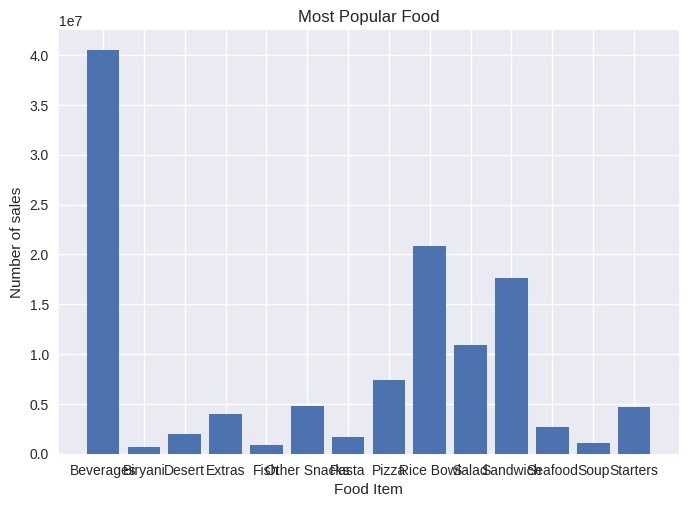

In [27]:
#Bar Graph.
plt.bar(table.index, table['num_orders'])

#x,y
plt.xlabel('Food Item')
plt.ylabel('Number of sales')
plt.title('Most Popular Food')


#Save plot
plt.savefig('output/plotmost popular.png', dpi=300,bbox_inches = 'tight')
plt.show();

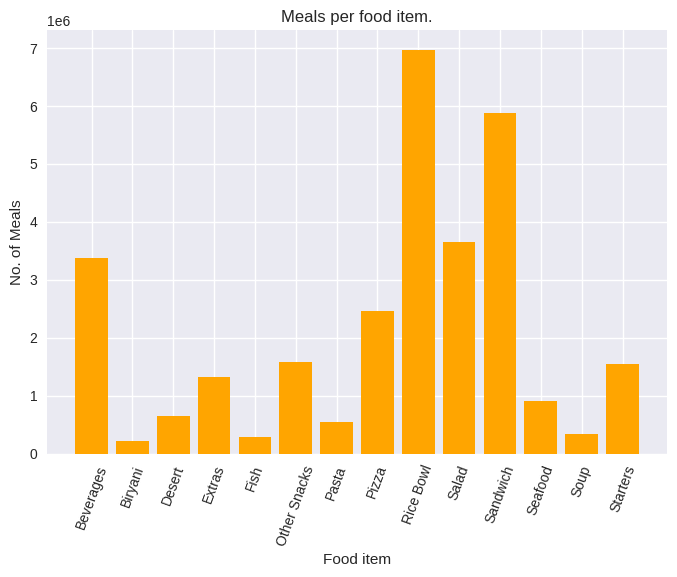

In [24]:
#Dictionary for meals per food item.
item_count = {}
for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category'] ==table.index[i]].shape[0]

#Bar plot.
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()], color = 'orange')

#adjust xticks.
plt.xticks(rotation = 70)

#label x_axis
plt.xlabel('Food item')

#label y_axis
plt.ylabel('No. of Meals')

#Save plot.
plt.title('Meals per food item.')

#Save plot.
plt.savefig('matplotlib_plotting_7.png',dpi=300, bbox_inches ='tight')

#display plot.
plt.show();

In [28]:
#Dictionary for cuisine and its total orders.
d_cuisine = {}
#total number of orders.
total = df['num_orders'].sum()

#find ratio of orders per cuisine.
for i in range (df['cuisine'].nunique()):
    #cuisine.
    c = df['cuisine'].unique()[i]

    #num of orders for cuisine.
    c_order = df[df['cuisine'] == c]['num_orders'].sum()
    d_cuisine[c] = c_order/total

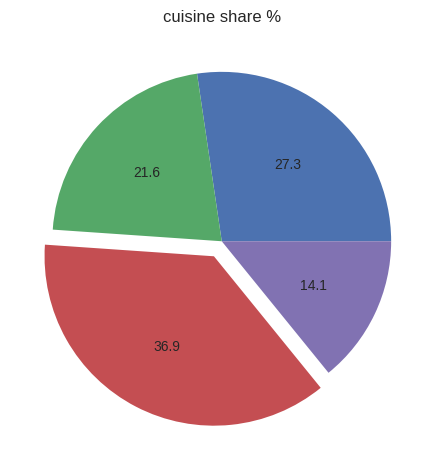

In [33]:
#pie plot
plt.pie([x*100 for x in d_cuisine.values()], autopct = '%0.1f', explode = [0,0,0.1,0])

#label the plot.
plt.title('cuisine share %')
plt.savefig('matplotlib_plotting_8.png', dpi=300, bbox_inches = 'tight')
plt.show();

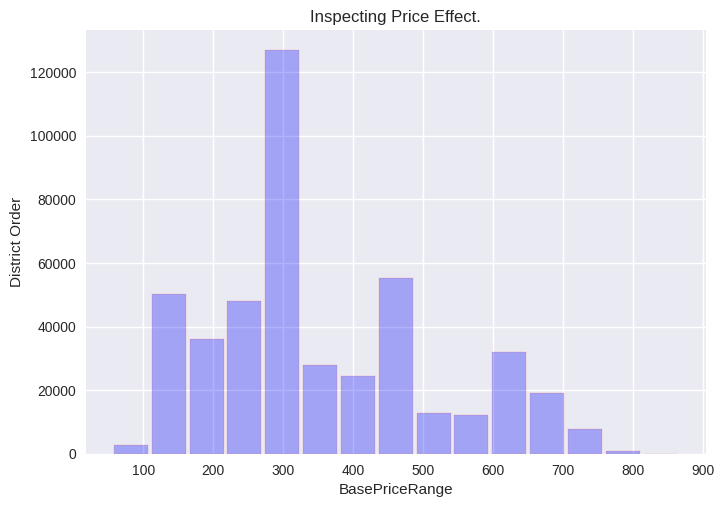

In [34]:
#Histogram to investigate data skewedness or distribution.
#Plotting.
plt.hist(df['base_price'], rwidth = 0.9, alpha = 0.3, color = 'blue',bins=15, edgecolor= 'red')

#x and y-axis labels.
plt.xlabel('BasePriceRange')
plt.ylabel('District Order')

#Plot title.
plt.title('Inspecting Price Effect.')

#Save and display plot.
plt.savefig('matplotlib_plotting_10.png', dpi= 300, bbox_inches='tight')

plt.show();